### This example shows how to plot choropleth maps (on state level and county level).

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sys.dont_write_bytecode = True
sys.path.append('../')
import plot_utils as pu

In [3]:
%matplotlib inline

### Read raw data (USA population density per state and county) and process raw data

In [4]:
filename = './datasets/DEC_10_SF1_GCTPH1.US05PR_with_ann.csv'

In [5]:
d0 = pd.read_csv(filename,header=1,dtype={'Target Geo Id2':str},encoding='latin1')  # read raw data
USA_avg = d0.iloc[0,-2]  # national average population density
d1 = d0.iloc[1:,[4,-2]]  # only extract useful columns
d1.columns = ['FIPS_code','pop_density']  # rename columns

Extract population density per state and per county

In [6]:
state_data  = d1.iloc[np.where(np.array(d1['FIPS_code'].astype(float)) <= 100)[0]]
county_data = d1.iloc[np.where(np.array(d1['FIPS_code'].astype(float)) >  100)[0]]
state_data = state_data.iloc[:-1,:].set_index('FIPS_code') # exclude Puerto Rico
county_data = county_data.loc[2:3194,:]  # exclude Puerto Rico

Take a look at the state-level population density:

In [7]:
state_data.head(5)  # two-digit FIPS codes are unique state identifiers (e.g., '01': Alabama, '02': Alaska)

,pop_density
FIPS_code,
01,94.4
02,1.2
04,56.3
05,56.0
06,239.1


In [8]:
county_data.head(5)  # five-digit FIPS codes are unique county identifiers (e.g., '01001': Autauga County, AL)

,FIPS_code,pop_density
2,01001,91.8
3,01003,114.6
4,01005,31.0
5,01007,36.8
6,01009,88.9


### Plot population density per state

For demonstration purposes, remove data of three states:

In [9]:
state_data_dropped = state_data.drop(['20','45','56'])  # drop some states on purpose

Plot choropleth map by state, with missing states shown as hash lines.

Kansas data missing (replaced with NaN).
South Carolina data missing (replaced with NaN).
Wyoming data missing (replaced with NaN).


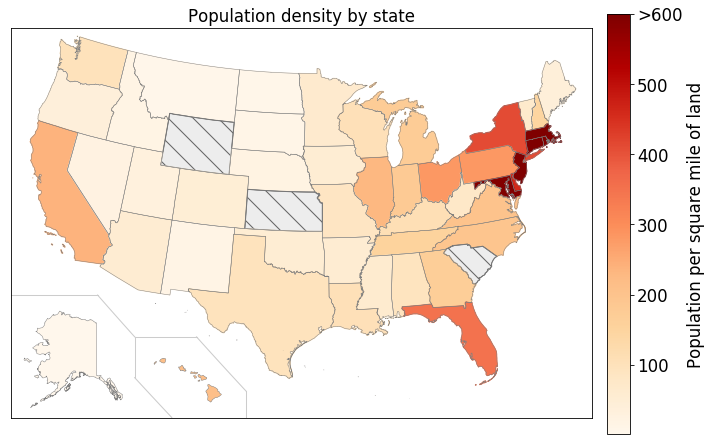

In [10]:
pu.choropleth_map_state(state_data_dropped,shapefile_dir='../shapefiles',
                        map_title='Population density by state',
                        unit='Population per square mile of land',
                        vmax=600,dpi=75,fontsize=16);

### Plot population density per county

The `cmap` argument can take a generic matplotlib color map object, such as the one generated from `seaborn`.

In [11]:
import seaborn as sns
sns.reset_orig()
cmap = sns.cubehelix_palette(light=0.95, as_cmap=True)

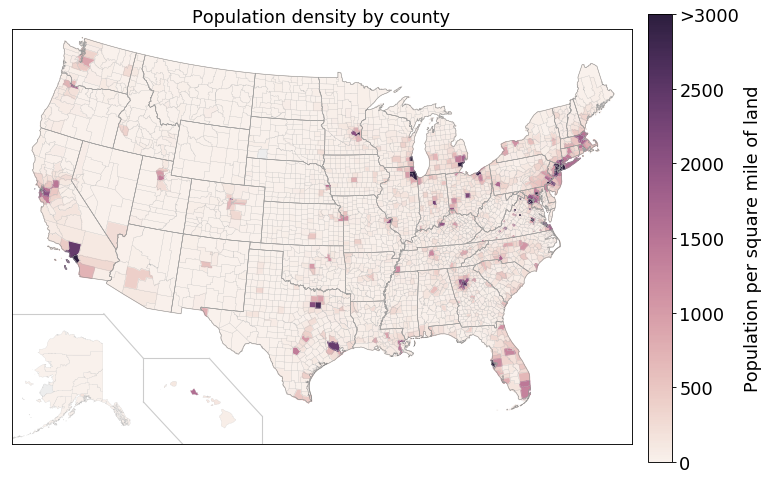

In [12]:
pu.choropleth_map_county(county_data,shapefile_dir='../shapefiles',
                         map_title='Population density by county',
                         unit='Population per square mile of land',
                         vmax=3000,dpi=80,fontsize=16,cmap=cmap);

### Population density difference compared to national average

For this type of "deviation choropleth map", the user is recommended to set the colormap to diverging colormaps such as `RdYlBu`. And the user can also manually specify the diverging point (the `cmap_midpoint` argument).

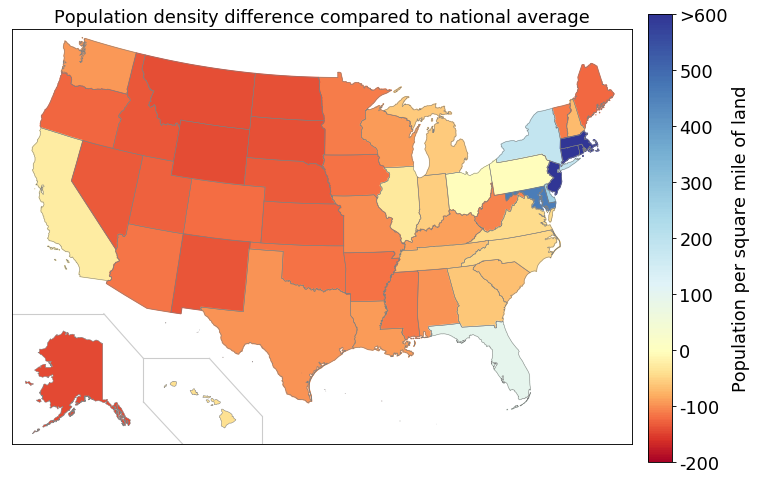

In [13]:
pu.choropleth_map_state(state_data-USA_avg,shapefile_dir='../shapefiles',
                        map_title='Population density difference compared to national average',
                        unit='Population per square mile of land',
                        vmax=600,vmin=-200,cmap='RdYlBu',cmap_midpoint=0,dpi=80,fontsize=16);